# Association - Dufal et al. model

The following figures show the checks of the results from the model of Dufal against the models implemewnted in CoolProp or calculated values from the paper of Dufal; in the case of methanol, a different EOS is implemented than in REFPROP, but that cannot explain the large deviations.

Note: There appears to be a typo in the methanol parameters as-published

In [1]:
import teqp, numpy as np, matplotlib.pyplot as plt, CoolProp.CoolProp as CP

In [2]:
Dufal_water = {
  "nonpolar": {
    "kind": "SAFT-VR-Mie",
    "model": {
      "coeffs": [
        {
          "name": "Water",
          "BibTeXKey": "Dufal-2015",
          "m": 1.0,
          "sigma_Angstrom": 3.0555,
          "epsilon_over_k": 418.00,
          "lambda_r": 35.823,
          "lambda_a": 6.0
        }
      ]
    }
  },
  "association": {
    "kind": "Dufal",
    "model": {
      "sigma / m": [3.0555e-10],
      "epsilon / J/mol": [3475.445374388054],
      "lambda_r": [35.823],
      "epsilon_HB / J/mol": [13303.140189045183],
      "K_HB / m^3": [496.66e-30],
      "kmat": [[0.0]],
      "Delta_rule": "Dufal",
      "molecule_sites": [["e","e","H","H"]]
    }
  }
}

Dufal_methanol = {
  "nonpolar": {
    "kind": "SAFT-VR-Mie",
    "model": {
      "coeffs": [
        {
          "name": "Methanol",
          "BibTeXKey": "Dufal-2015",
          "m": 1.7989,
          "sigma_Angstrom": 3.1425,
          "epsilon_over_k": 276.96,
          "lambda_r": 16.968,
          "lambda_a": 6.0
        }
      ]
    }
  },
  "association": {
    "kind": "Dufal",
    "model": {
      "sigma / m": [3.1425e-10],
      "epsilon / J/mol": [276.96*8.31446261815324],
      "lambda_r": [16.968],
      "epsilon_HB / J/mol": [2156.0*8.31446261815324],
      "K_HB / m^3": [222.18e-30],
      "kmat": [[0.0]],
      "Delta_rule": "Dufal",
      "molecule_sites": [["e","H","H"]]
    }
  }
}

Dufal_ammonia = {
  "nonpolar": {
    "kind": "SAFT-VR-Mie",
    "model": {
      "coeffs": [
        {
          "name": "Ammonia",
          "BibTeXKey": "Dufal-2015",
          "m": 1.0,
          "sigma_Angstrom": 3.3309,
          "epsilon_over_k": 323.70,
          "lambda_r": 36.832,
          "lambda_a": 6.0
        }
      ]
    }
  },
  "association": {
    "kind": "Dufal",
    "model": {
      "sigma / m": [3.3309e-10],
      "epsilon / J/mol": [323.70*8.31446261815324],
      "lambda_r": [36.832],
      "epsilon_HB / J/mol": [1105.0*8.31446261815324],
      "K_HB / m^3": [560.73e-30],
      "kmat": [[0.0]],
      "Delta_rule": "Dufal",
      "molecule_sites": [["e","H","H","H"]]
    }
  }
}

# Tabulated values from Dufal for non-bonded fraction for water from the Mie kernel (Eq. 30):
# Note the last "liquid" point in Dufal is actually for the vapor phase
TL_Dufal = [252.10,270.00,290.00,300.00,310.00,314.14,330.00,348.85,350.00,370.00,388.70,390.00,400.00,410.00,416.67,430.00,450.00,450.00,470.00,476.76,490.00,500.00,503.19,510.00,530.00,550.00,556.52,570.00,579.71,590.00,600.00,610.00,620.00]
XL_A_Dufal = [0.060,0.073,0.089,0.098,0.106,0.110,0.124,0.142,0.143,0.162,0.180,0.182,0.192,0.202,0.209,0.223,0.245,0.245,0.267,0.275,0.290,0.302,0.306,0.314,0.339,0.364,0.373,0.391,0.405,0.420,0.435,0.451,0.468]
TV_Dufal = [300.00,314.14,348.85,350.00,370.00,388.70,390.00,400.00,410.00,416.67,430.00,450.00,450.00,470.00,476.76,490.00,500.00,510.00,530.00,550.00,570.00,590.00,600.00,610.00,620.00,638.60]
XV_A_Dufal = [0.998,0.997,0.992,0.992,0.988,0.982,0.982,0.979,0.975,0.973,0.967,0.958,0.958,0.947,0.943,0.935,0.928,0.921,0.906,0.890,0.872,0.852,0.841,0.829,0.816,0.789]

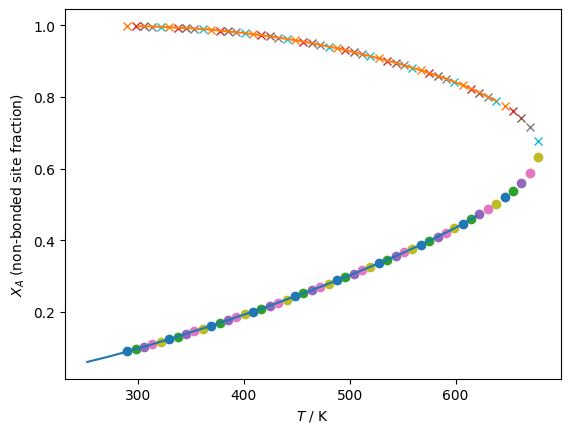

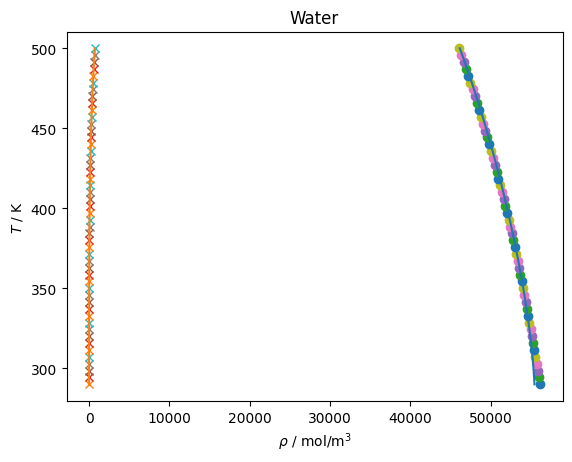

In [3]:
model = teqp.make_model({"kind":"genericSAFT", "model":Dufal_water})
anc = teqp.build_ancillaries(model, 676, 7000, 290)
z = np.array([1.0])
for T in np.linspace(290, 678):
    rhoL, rhoV = model.pure_VLE_T(T, anc.rhoL(T), anc.rhoV(T), 10)
    X_A = model.get_assoc_calcs(T, rhoL, z)['X_A']
    plt.plot(T, X_A[0],'o')
    X_A = model.get_assoc_calcs(T, rhoV, z)['X_A']
    plt.plot(T, X_A[0],'x')

plt.plot(TL_Dufal, XL_A_Dufal)
plt.plot(TV_Dufal, XV_A_Dufal)
plt.gca().set(xlabel='$T$ / K', ylabel='$X_A$ (non-bonded site fraction)');

plt.figure()
Ts = np.linspace(290, 500)
for T in Ts:
    rhoL, rhoV = model.pure_VLE_T(T, anc.rhoL(T), anc.rhoV(T), 10)
    plt.plot(rhoL, T,'o')
    plt.plot(rhoV, T,'x')
    
plt.plot(CP.PropsSI('Dmolar','T',Ts,'Q',0,'Water'), Ts)
plt.plot(CP.PropsSI('Dmolar','T',Ts,'Q',1,'Water'), Ts)
plt.title('Water')
plt.gca().set(xlabel=r'$\rho$ / mol/m$^3$', ylabel=r'$T$ / K');

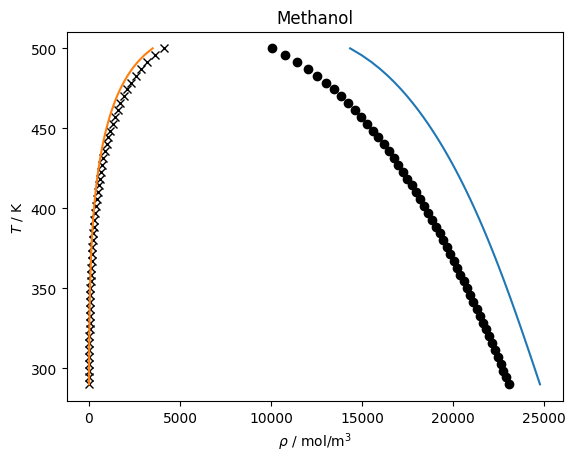

In [4]:
model = teqp.make_model({"kind":"genericSAFT", "model": Dufal_methanol})
anc = teqp.build_ancillaries(model, 520, 5000, 290)
z = np.array([1.0])

Ts = np.linspace(290, 500)
for T in Ts:
    rhoL, rhoV = model.pure_VLE_T(T, anc.rhoL(T), anc.rhoV(T), 10)
    plt.plot(rhoL, T,'ko')
    plt.plot(rhoV, T,'kx')
    
plt.plot(CP.PropsSI('Dmolar','T',Ts,'Q',0,'Methanol'), Ts)
plt.plot(CP.PropsSI('Dmolar','T',Ts,'Q',1,'Methanol'), Ts)
plt.title('Methanol')
plt.gca().set(xlabel=r'$\rho$ / mol/m$^3$', ylabel=r'$T$ / K');

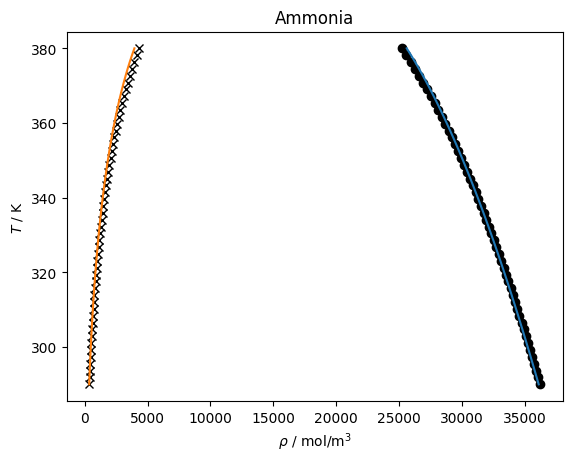

In [5]:
model = teqp.make_model({"kind":"genericSAFT", "model": Dufal_ammonia})
anc = teqp.build_ancillaries(model, 520, 5000, 290)
z = np.array([1.0])

Ts = np.linspace(290, 380)
for T in Ts:
    rhoL, rhoV = model.pure_VLE_T(T, anc.rhoL(T), anc.rhoV(T), 10)
    plt.plot(rhoL, T,'ko')
    plt.plot(rhoV, T,'kx')
    
plt.plot(CP.PropsSI('Dmolar','T',Ts,'Q',0,'Ammonia'), Ts)
plt.plot(CP.PropsSI('Dmolar','T',Ts,'Q',1,'Ammonia'), Ts)
plt.title('Ammonia')
plt.gca().set(xlabel=r'$\rho$ / mol/m$^3$', ylabel=r'$T$ / K');

In [6]:
# ammonia+water VLE at constant temperature

ammonia = teqp.make_model({"kind":"genericSAFT", "model": Dufal_ammonia})

Dufal_ammoniawater = {
  "nonpolar": {
    "kind": "SAFT-VR-Mie",
    "model": {
      "coeffs": [
        {
          "name": "Ammonia",
          "BibTeXKey": "Dufal-2015",
          "m": 1.0,
          "sigma_Angstrom": 3.3309,
          "epsilon_over_k": 323.70,
          "lambda_r": 36.832,
          "lambda_a": 6.0
        },
        {
          "name": "Water",
          "BibTeXKey": "Dufal-2015",
          "m": 1.0,
          "sigma_Angstrom": 3.0555,
          "epsilon_over_k": 418.00,
          "lambda_r": 35.823,
          "lambda_a": 6.0
        }
      ]
    }
  },
  "association": {
    "kind": "Dufal",
    "model": {
      "sigma / m": [3.3309e-10, 3.0555e-10],
      "epsilon / J/mol": [323.70*8.31446261815324, 3475.445374388054],
      "lambda_r": [36.832, 35.823],
      "epsilon_HB / J/mol": [1105.0*8.31446261815324, 13303.140189045183],
      "K_HB / m^3": [560.73e-30, 496.66e-30],
      "kmat": [[0.0,0.0],[0,0]],
      "Delta_rule": "Dufal",
      "molecule_sites": [["e","H","H","H"],["e","e","H","H"]]
    }
  }
}

T = 298.15
rhoL0, rhoV0 = ammonia.pure_VLE_T(T, anc.rhoL(T), anc.rhoV(T), 10)

ammoniawater = teqp.make_model({"kind":"genericSAFT", "model": Dufal_ammoniawater})
ammoniawater.trace_VLE_isotherm_binary(T, np.array([rhoL0, 0]), np.array([rhoV0, 0]))

[{'T / K': 298.15,
  'c': -1.0,
  'drho/dt': [-0.3009031150143573,
   0.9532863025715441,
   -0.026505253934592687,
   0.00011053503374651266],
  'dt': 1e-05,
  'pL / Pa': -1348980.0114703327,
  'pV / Pa': 850585.1099931961,
  'rhoL / mol/m^3': [35515.45114721886, 0.0],
  'rhoV / mol/m^3': [487.03357583366795, 0.0],
  't': 0.0,
  'xL_0 / mole frac.': 1.0,
  'xV_0 / mole frac.': 1.0},
 {'T / K': 298.15,
  'c': -1.0,
  'drho/dt': [-0.31109872729343796,
   0.9503192359545914,
   -0.010532216621598695,
   6.375045523910206e-05],
  'dt': 4.5e-05,
  'pL / Pa': 530725.4885882735,
  'pV / Pa': 530725.4885943136,
  'rhoL / mol/m^3': [35626.35313673362, 9.532863025498762e-06],
  'rhoV / mol/m^3': [262.742533599565, 6.394949560729698e-10],
  't': 1e-05,
  'xL_0 / mole frac.': 0.9999999997324209,
  'xV_0 / mole frac.': 0.9999999999975661},
 {'T / K': 298.15,
  'c': -1.0,
  'drho/dt': [-0.3110987287489849,
   0.9503192354218599,
   -0.010532221696140152,
   6.375045478498421e-05],
  'dt': 0.0002025